# Movie_Reviews_Sentiment_Analysis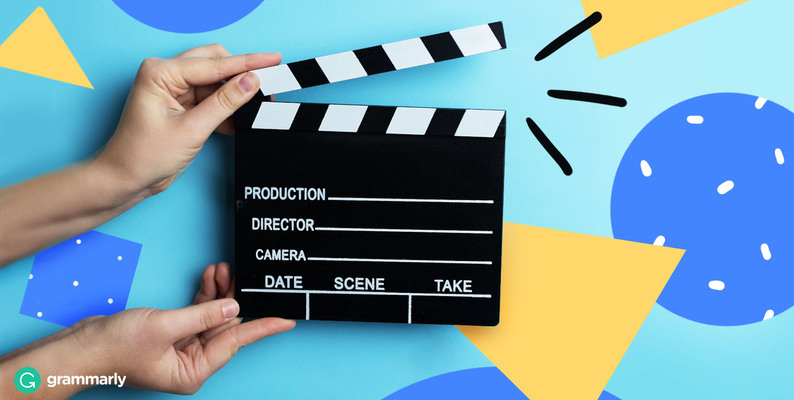

In [ ]:
# Importing the libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/movie.csv')
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [ ]:
df.shape

(40000, 2)

In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   label   40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
df.duplicated().sum()

277

In [ ]:
# Dropping the duplicates :
df = df.drop_duplicates()
df.shape

(39723, 2)

In [ ]:
df['label'].value_counts()

1    19908
0    19815
Name: label, dtype: int64

In [ ]:
df[df['label']==0]['text'].head()

0    I grew up (b. 1965) watching and loving the Th...
1    When I put this movie in my DVD player, and sa...
2    Why do people who do not know what a particula...
3    Even though I have great interest in Biblical ...
5    A terrible movie as everyone has said. What ma...
Name: text, dtype: object

In [ ]:
df[df['label']==1]['text'].head()

4     Im a die hard Dads Army fan and nothing will e...
6     Finally watched this shocking movie last night...
8     It may be the remake of 1987 Autumn's Tale aft...
9     My Super Ex Girlfriend turned out to be a plea...
10    I can't believe people are looking for a plot ...
Name: text, dtype: object

In [ ]:
df[df['label']==0]['text'].iloc[0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

In [ ]:
df[df['label']==1]['text'].iloc[0]

'Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD\'s and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re run of certain episodes, Man and the hour, Enemy within the gates, Battle School and numerous others with a different edge. Introduction of a new General instead of Captain Square was a brilliant move - especially when he wouldn\'t cash the cheque (something that is rarely done now).<br /><br />It follows through the early years of getting equipment and uniforms, starting up and training. All in all, its a great film for a boring Sunday afternoon. <br /><br />Two draw backs. One is the Germans bogus dodgy accents (come one, Germans cant pronounced the letter "W" like us) and Two The casting of Liz Frazer instead of the familiar Janet Davis. I like Liz in other films like the carry ons but she doesn\'t carry it correctly in this and Janet Davis would have been the better choice.'

# Cleaning the text

In [ ]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('[^\w\s]', '', text)
    return text

df['text'] = df['text'].apply(lambda x : clean_text(x))

In [ ]:
df['text'].head()

0    i grew up b 1965 watching and loving the thund...
1    when i put this movie in my dvd player and sat...
2    why do people who do not know what a particula...
3    even though i have great interest in biblical ...
4    im a die hard dads army fan and nothing will e...
Name: text, dtype: object

In [ ]:
#number of words
df['Num_words'] = df['text'].apply (lambda x:len(str(x).split()))
df.head()

,text,label,Num_words
0,i grew up b 1965 watching and loving the thund...,0,151
1,when i put this movie in my dvd player and sat...,0,326
2,why do people who do not know what a particula...,0,184
3,even though i have great interest in biblical ...,0,69
4,im a die hard dads army fan and nothing will e...,1,177


Removing Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
# Removing Stopwords
import nltk
from nltk.corpus import stopwords

stopword = set(stopwords.words('english'))
def remove_stopword(text):
    return " ".join([word for word in str(text).split() if word not in stopword])

df['text'] = df['text'].apply(remove_stopword)

In [ ]:
df[df['label']==1]['text'].iloc[0]

'im die hard dads army fan nothing ever change got tapes dvds audiobooks every time watchlisten brand new br br film film run certain episodes man hour enemy within gates battle school numerous others different edge introduction new general instead captain square brilliant move especially wouldnt cash cheque something rarely done nowbr br follows early years getting equipment uniforms starting training great film boring sunday afternoon br br two draw backs one germans bogus dodgy accents come one germans cant pronounced letter w like us two casting liz frazer instead familiar janet davis like liz films like carry ons doesnt carry correctly janet davis would better choice'

In [ ]:
df['text'].head()

0    grew b 1965 watching loving thunderbirds mates...
1    put movie dvd player sat coke chips expectatio...
2    people know particular time past like feel nee...
3    even though great interest biblical movies bor...
4    im die hard dads army fan nothing ever change ...
Name: text, dtype: object

In [ ]:
# Num of words after removing stopwords
df['Num_words_after_stopword'] = df['text'].apply (lambda x:len(str(x).split()))
df.head()

,text,label,Num_words,Num_words_after_stopword
0,grew b 1965 watching loving thunderbirds mates...,0,151,87
1,put movie dvd player sat coke chips expectatio...,0,326,157
2,people know particular time past like feel nee...,0,184,99
3,even though great interest biblical movies bor...,0,69,33
4,im die hard dads army fan nothing ever change ...,1,177,107


## Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['text'] = df['text'].apply(lambda text: lemmatize_words(text))

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df.head()

,text,label,Num_words,Num_words_after_stopword
0,grew b 1965 watching loving thunderbird mate s...,0,151,87
1,put movie dvd player sat coke chip expectation...,0,326,157
2,people know particular time past like feel nee...,0,184,99
3,even though great interest biblical movie bore...,0,69,33
4,im die hard dad army fan nothing ever change g...,1,177,107


## Visualization

In [ ]:
# Common words in text
from collections import Counter
count = Counter()
for text in df['text'].values:
  for word in text.split():
    count[word]+=1

common = pd.DataFrame(count.most_common(20))
common.columns = ['Common_words','count']
common.style.background_gradient(cmap = 'Blues')

,Common_words,count
0,br,90458
1,movie,78839
2,film,71346
3,one,42425
4,like,31867
5,time,23360
6,good,22934
7,character,21998
8,even,19579
9,get,19543


In [ ]:
positive = df[df['label']==1]
negative = df[df['label']==0]

In [ ]:
count_p = Counter()
for text in positive['text'].values:
  for word in text.split():
    count_p[word]+=1

pos = pd.DataFrame(count_p.most_common(20))
pos.columns = ['Positive_words','count']
pos.style.background_gradient(cmap = 'Greens')

,Positive_words,count
0,br,44090
1,film,38148
2,movie,34490
3,one,21825
4,like,14182
5,time,12098
6,good,11544
7,character,10989
8,story,10884
9,great,10164


In [ ]:
count_n = Counter()
for text in negative['text'].values:
  for word in text.split():
    count_n[word]+=1

neg = pd.DataFrame(count_n.most_common(20))
neg.columns = ['Negative_words','count']
neg.style.background_gradient(cmap = 'Reds')

,Negative_words,count
0,br,46368
1,movie,44349
2,film,33198
3,one,20600
4,like,17685
5,even,11986
6,good,11390
7,time,11262
8,bad,11148
9,character,11009


### WordCloud

In [ ]:
from wordcloud import WordCloud

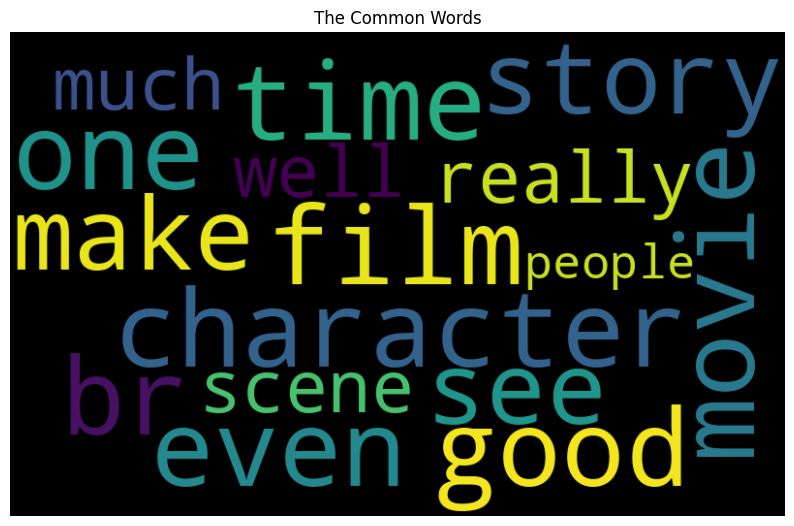

In [ ]:
common_words =' '.join([text for text in common['Common_words']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(common_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Common Words')
plt.show()

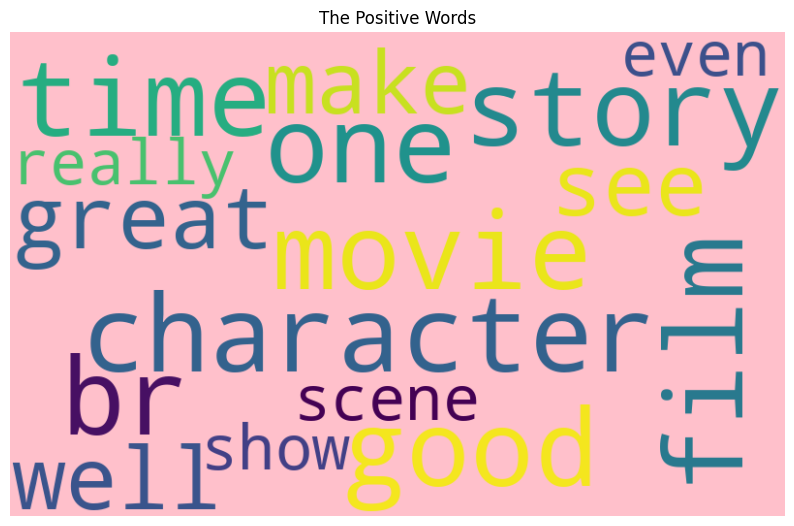

In [ ]:
positive_words =' '.join([text for text in pos['Positive_words']])

wordcloud = WordCloud(background_color = 'pink', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

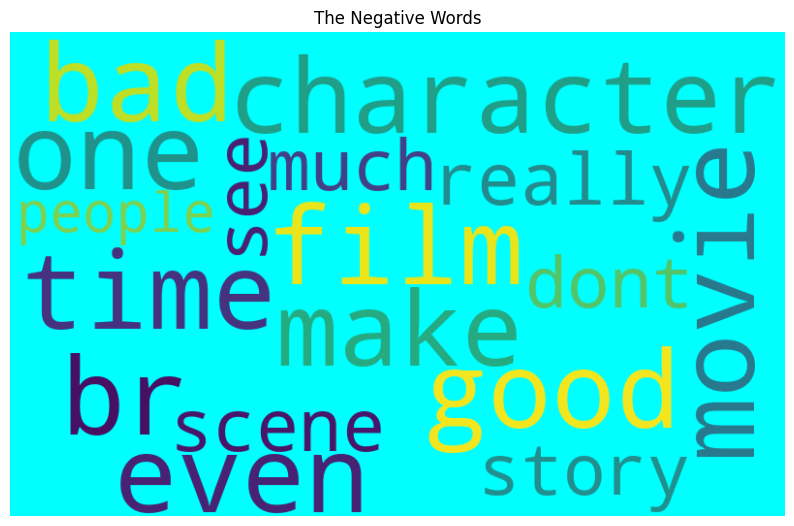

In [ ]:
negative_words =' '.join([text for text in neg['Negative_words']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

## MODELLING

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(df['text'])
train_vectors

<39723x149261 sparse matrix of type '<class 'numpy.int64'>'
	with 3912148 stored elements in Compressed Sparse Row format>

In [ ]:
# Splitting the dependent and independent variable
x = train_vectors
y = df['label']

In [ ]:
# Train_Test_Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=42)

In [ ]:
#lists to store the values of accuracy
from sklearn.metrics import accuracy_score
train_accu = []
test_accu = []

## Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train,y_train)
#Predictions
y_pred_train_nb = nb.predict(x_train)
y_pred_test_nb = nb.predict(x_test)
# Accuracy Score
train_accu_nb = accuracy_score(y_train,y_pred_train_nb)
test_accu_nb = accuracy_score(y_test,y_pred_test_nb)
print("Training Accuracy :",train_accu_nb)
print()
print("Testing Accuracy :",test_accu_nb)
train_accu.append(train_accu_nb)
test_accu.append(test_accu_nb)

Training Accuracy : 0.9197558059034552

Testing Accuracy : 0.8599118942731278


In [ ]:
print(train_accu)

[0.9197558059034552]


In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)
#Predictions
y_pred_train_log = log.predict(x_train)
y_pred_test_log = log.predict(x_test)
# Accuracy Score
train_accu_log = accuracy_score(y_train,y_pred_train_log)
test_accu_log = accuracy_score(y_test,y_pred_test_log)
print("Training Accuracy :",train_accu_log)
print()
print("Testing Accuracy :",test_accu_log)
train_accu.append(accuracy_score(y_train,y_pred_train_log))
test_accu.append(accuracy_score(y_test,y_pred_test_log) )

Training Accuracy : 0.9976713449556297

Testing Accuracy : 0.878665827564506


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
#Predictions
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)
# Accuracy Score
train_accu_rfc = accuracy_score(y_train,y_pred_train_rfc)
test_accu_rfc = accuracy_score(y_test,y_pred_test_rfc)
print("Training Accuracy :",train_accu_rfc)
print()
print("Testing Accuracy :",test_accu_rfc)
train_accu.append(train_accu_rfc)
test_accu.append(test_accu_rfc)

Training Accuracy : 1.0

Testing Accuracy : 0.8533668974197609


## Confusion Matrix

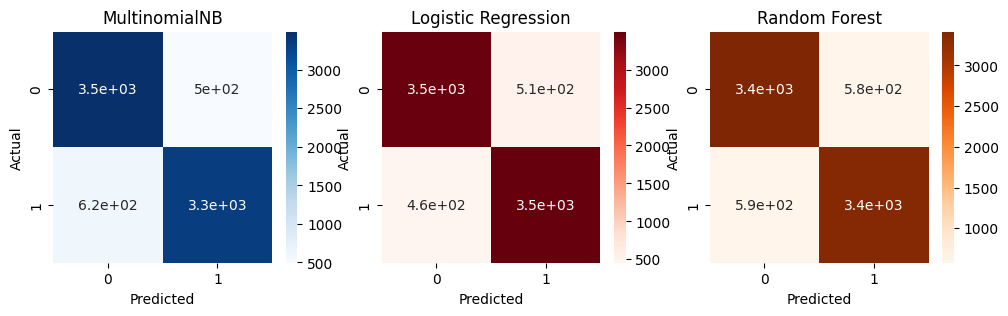

In [82]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,3))
plt.subplot(131)
sns.heatmap(confusion_matrix(y_test,y_pred_test_nb),cmap='Blues',annot=True)
plt.title("MultinomialNB")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(132)
sns.heatmap(confusion_matrix(y_test,y_pred_test_log),cmap='Reds',annot=True)
plt.title("Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(133)
sns.heatmap(confusion_matrix(y_test,y_pred_test_rfc),cmap='Oranges',annot=True)
plt.title("Random Forest")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [78]:
mod = ['MultinomialNB','Logistic','Random Forest']

data = {'model':mod ,'Train_Accuracy':train_accu,'Test_Accuracy':test_accu}
frame = pd.DataFrame(data).round(2)
frame

,model,Train_Accuracy,Test_Accuracy
0,MultinomialNB,0.92,0.86
1,Logistic,1.00,0.88
2,Random Forest,1.00,0.85


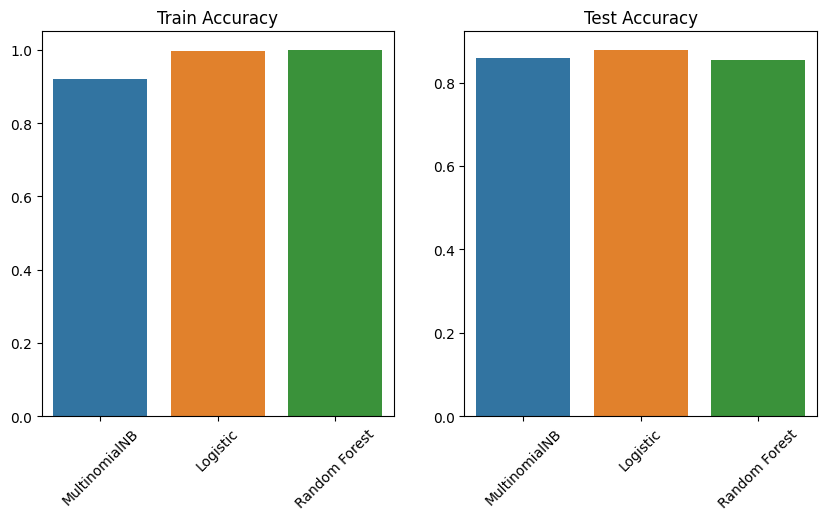

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.barplot(x='model',y='Train_Accuracy',data=data)
plt.xticks(rotation=45)
plt.title('Train Accuracy')

plt.subplot(122)
sns.barplot(x='model',y='Test_Accuracy',data=data)
plt.xticks(rotation=45)
plt.title('Test Accuracy')
plt.show()

## Conclusion :

*   Training accuracy is greater than 90% while test accuracy is greater than 85%
*   While Logistic Regression and Random Forest Classifier are giving high variance Multinomial Naive Bayes is right for the model.


*   There is scope of improvement by doing the cross validation and hyperparameter tuning.






